In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_columns",30)
pd.set_option("display.max_colwidth",50)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# **<p style="color:Orange;">Project:</p>**

# **<p style="color:#3498db;">🧠 Productivity & Task Success Prediction using Machine Learning**

> “Can we predict success from coding habits, coffee, and cognitive load?” Let's find out. 🚀

---

## 📊 Project Overview

This project aims to predict whether a task is completed successfully (`task_success`) based on various behavioral metrics such as:

- ☕ **Coffee Intake**
- 🧑‍💻 **Coding Hours**
- 💤 **Sleep Hours**
- 🐛 **Bugs Reported**
- 📈 **Cognitive Load**  
- ⏱️ **AI Usage Time**, and more...

---

## 📂 Dataset Preview


In [3]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\ai_dev_productivity.csv")

## Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.shape

(500, 9)

## Data Handling & Cleaning

In [6]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [7]:
df=df.rename({"hours_coding":"coding_hours"},axis=1)

## EDA & Visualization

> 🧼 *A clean dataset is the canvas for a meaningful story.*

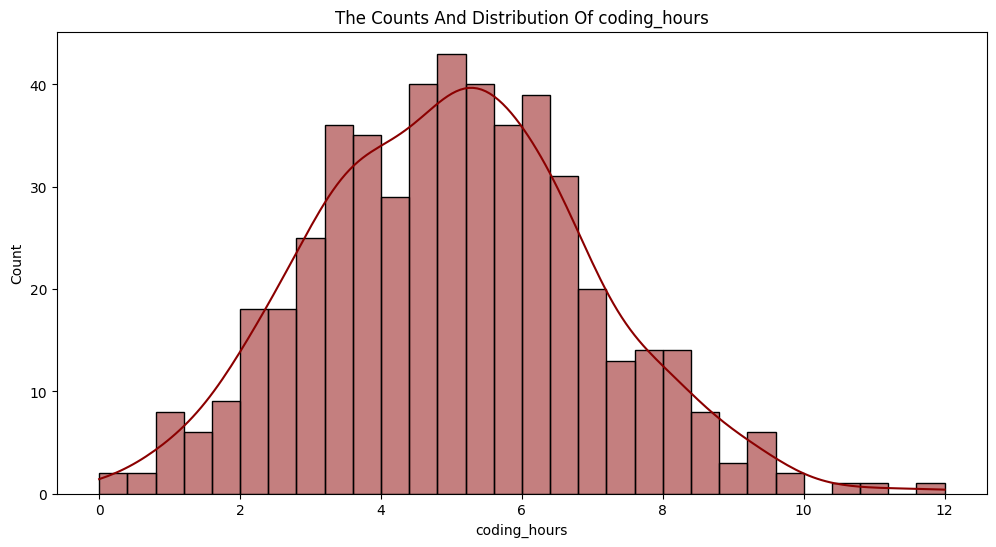

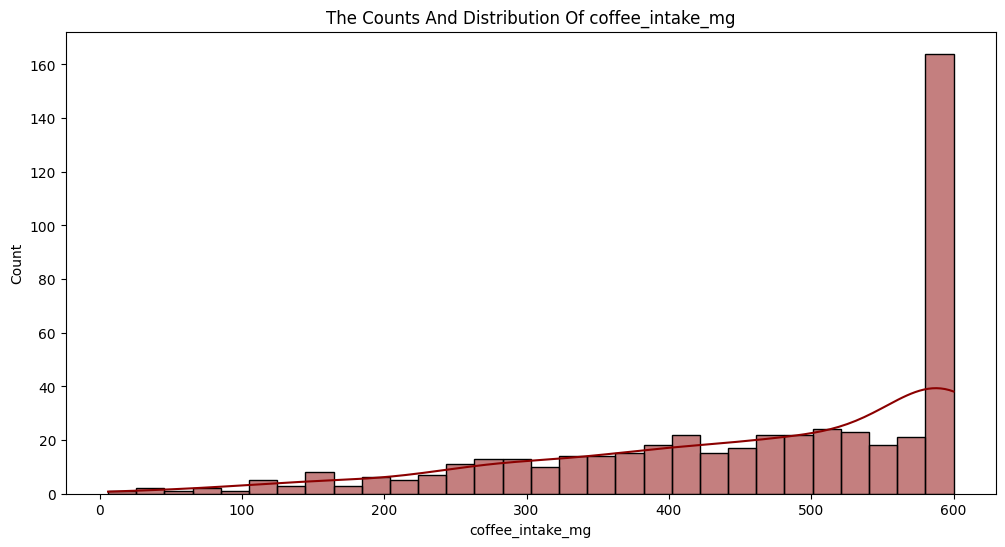

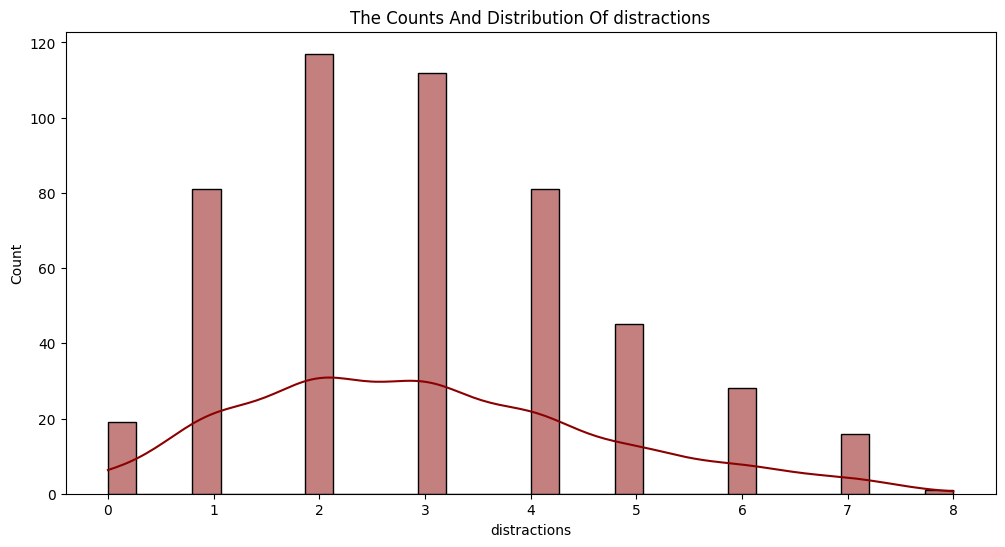

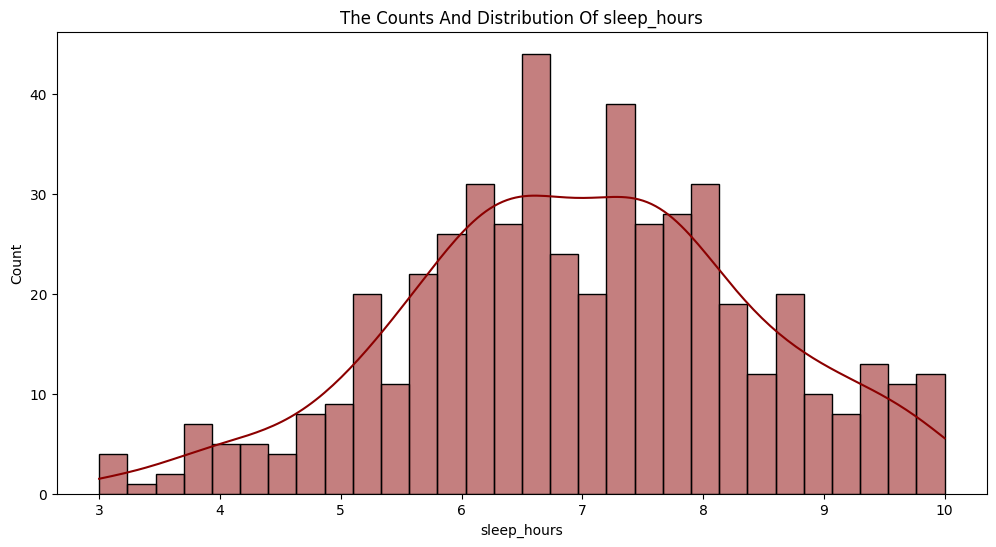

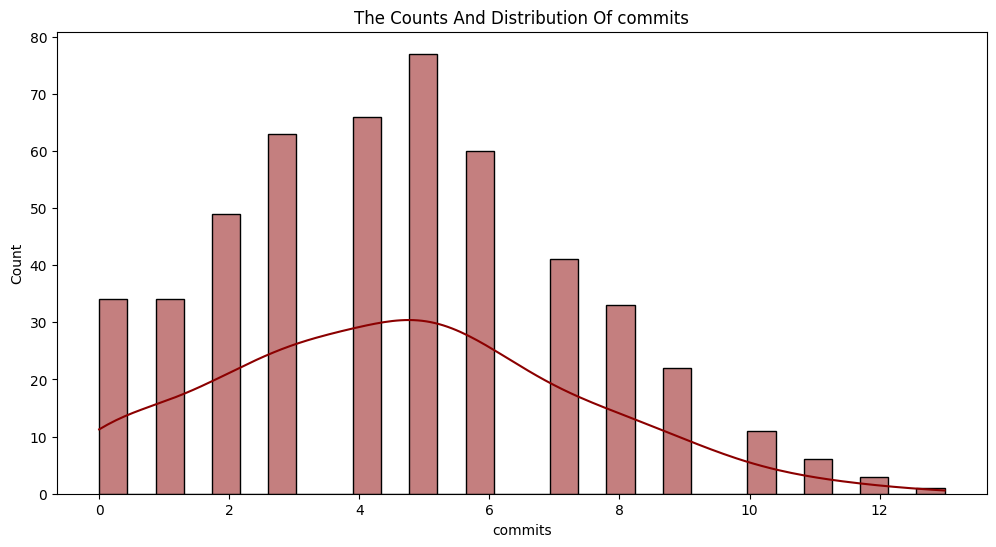

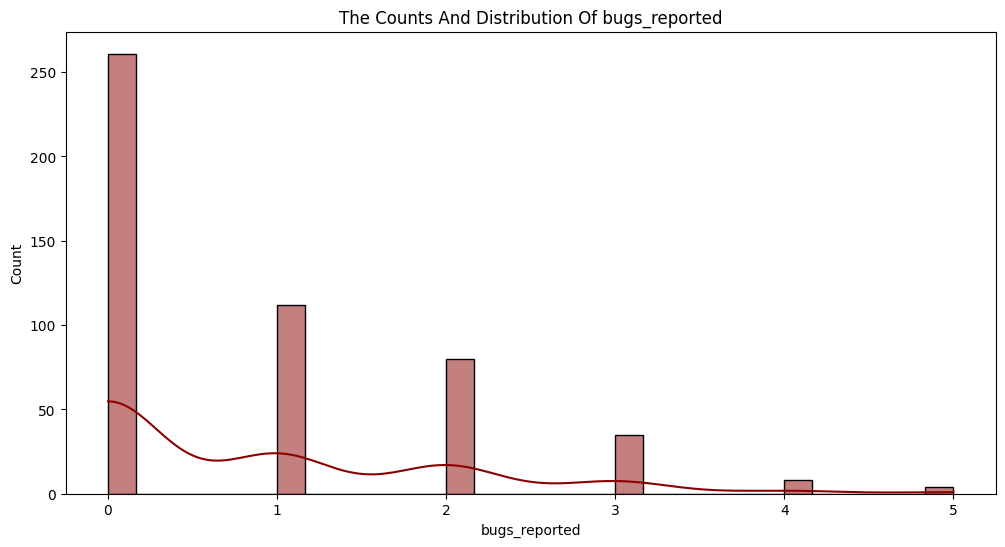

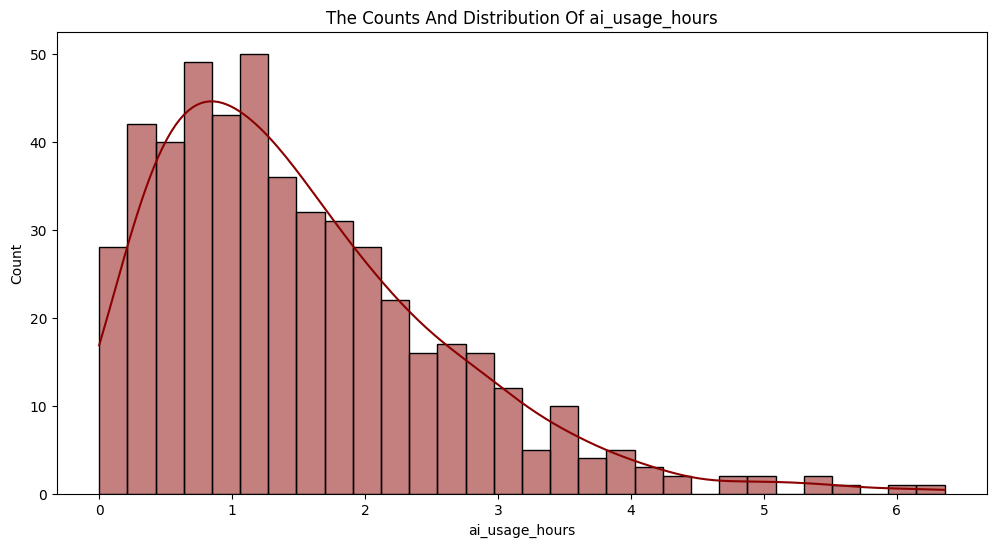

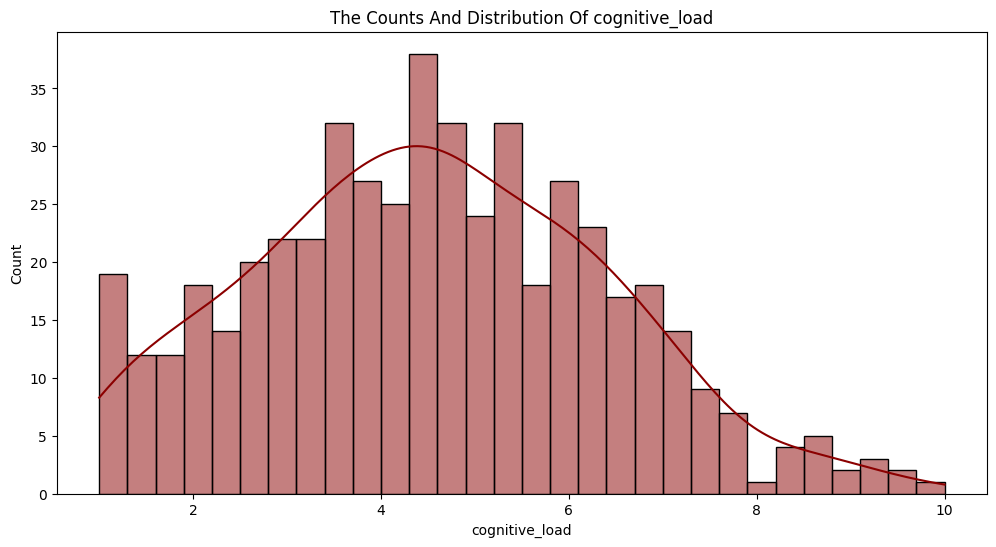

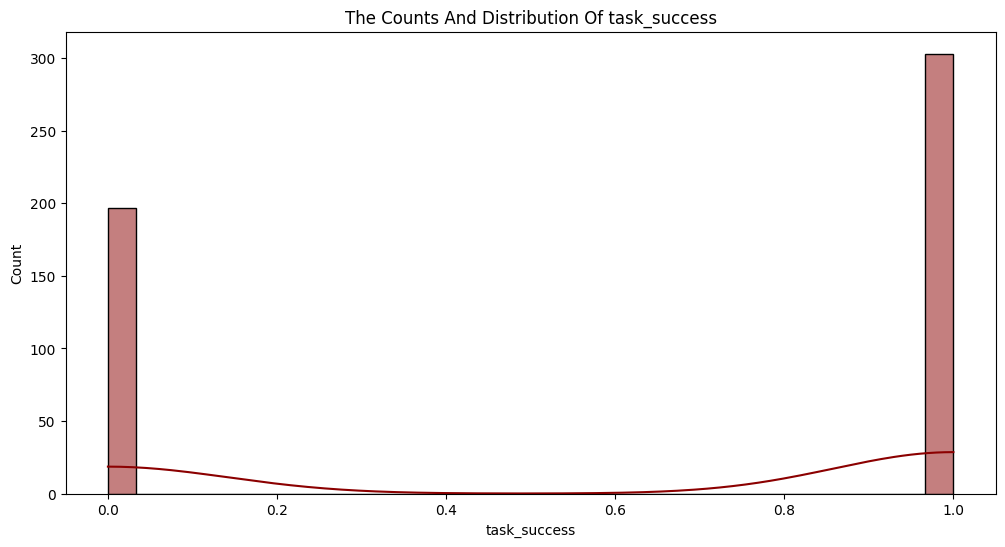

In [8]:
df=df
for col in df:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,bins=30,color="darkred")
    plt.title(f"The Counts And Distribution Of {col}")
    plt.show()

In [9]:
classifi_c=df.groupby(["coding_hours","sleep_hours"]).sum().reset_index()
classifi_c=classifi_c[["coding_hours","sleep_hours"]]
avg_c=classifi_c.mean()

In [10]:
fig=px.scatter(classifi_c)
fig.show()

### `The Average Of Coding And Sleep hours`

Text(0.5, 1.0, 'The Average Of Coding And Sleep hours')

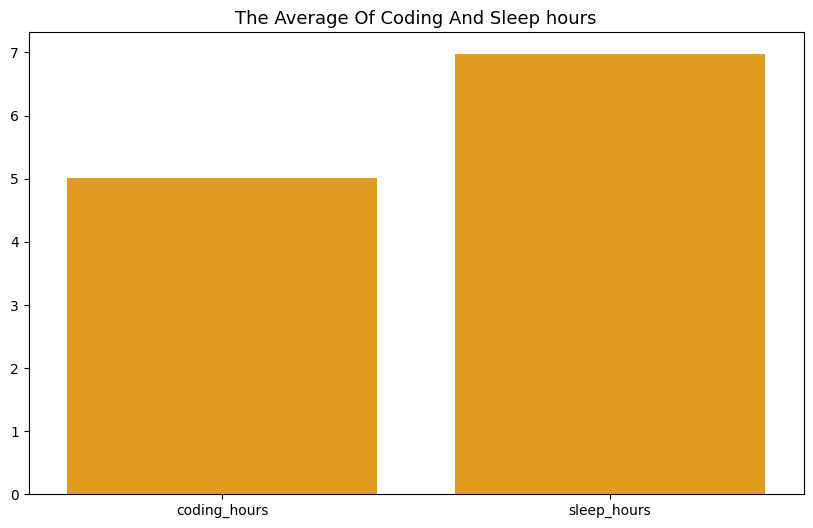

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_c,color="orange")
plt.title("The Average Of Coding And Sleep hours",fontsize=13)

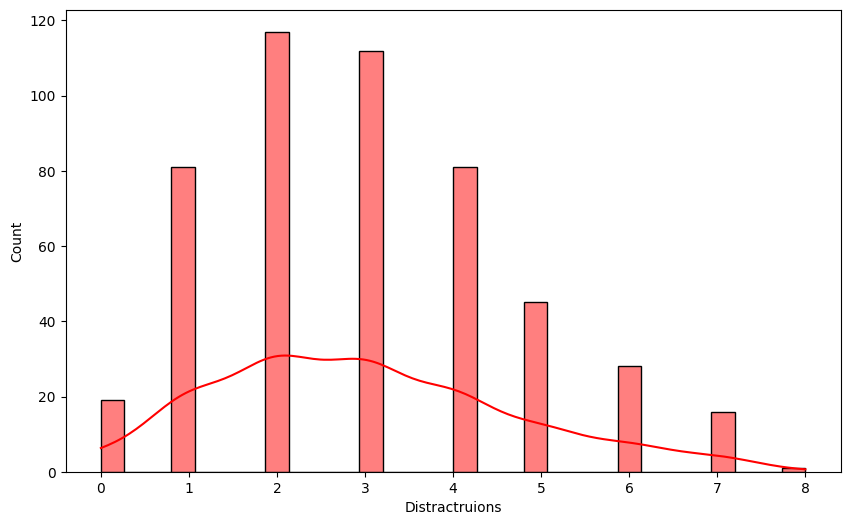

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=df["distractions"],kde=True,bins=30,color="red")
plt.xlabel("Distractruions")
plt.show()

### `Correalation Heatmap`

Text(0.5, 1.0, 'Correlation Heatmap')

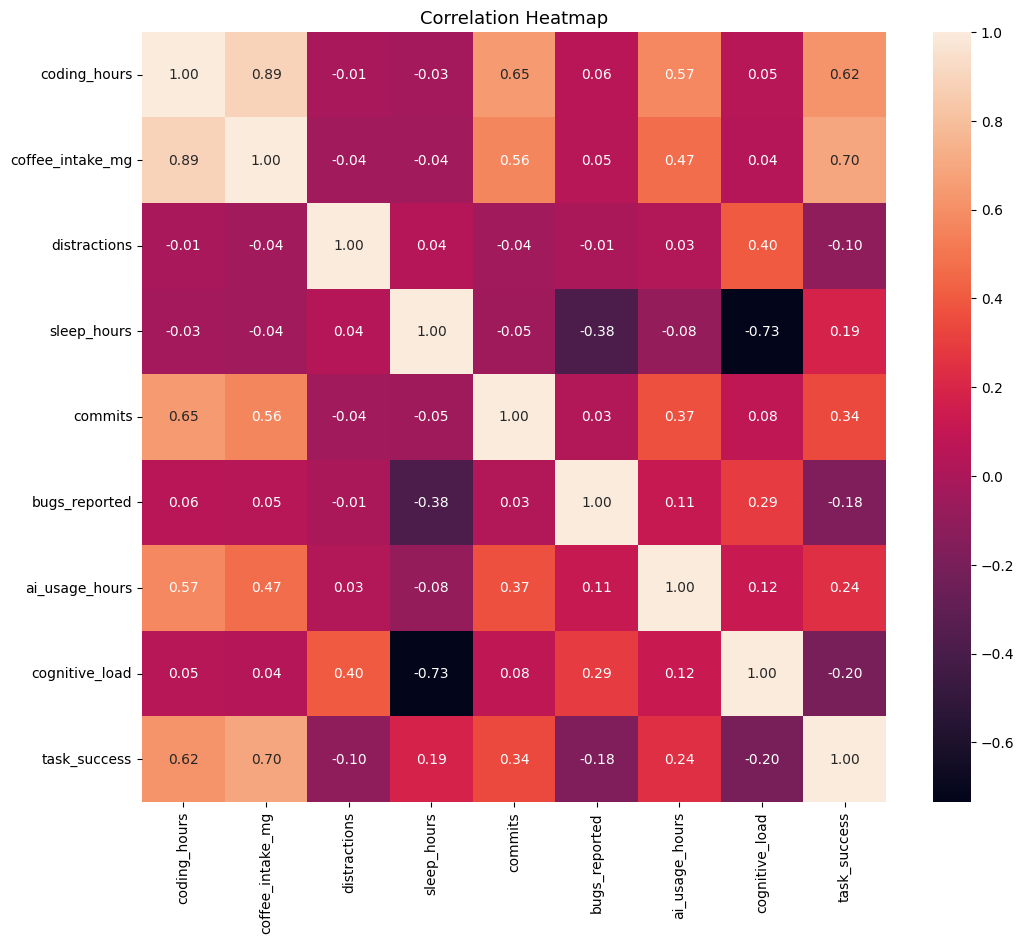

In [13]:
dx=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=dx,annot=True,fmt=".2f")
plt.title("Correlation Heatmap",fontsize=13)

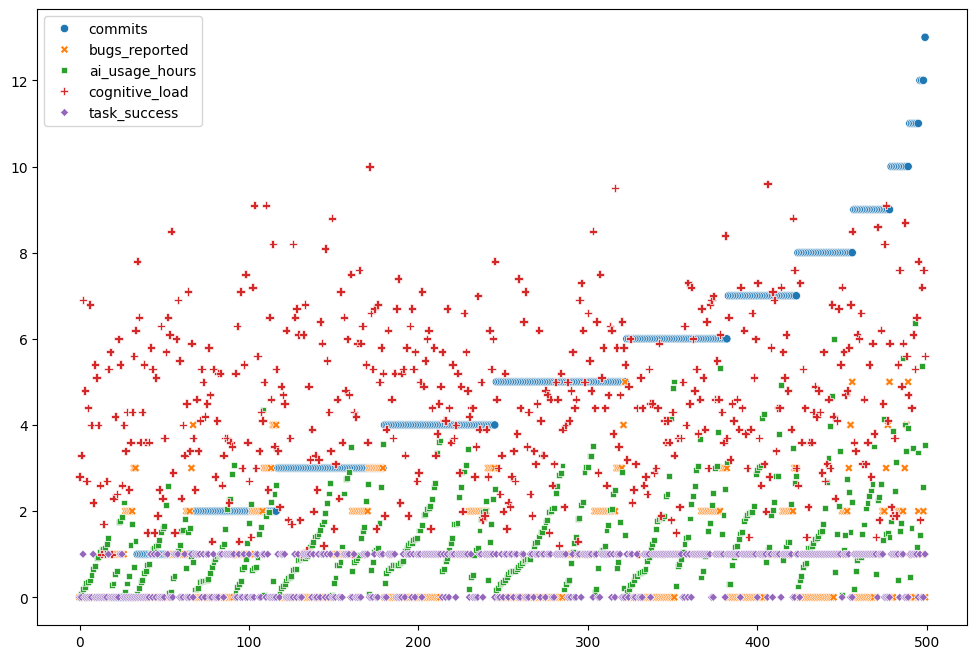

In [14]:
classifi_co=df.groupby(["commits","bugs_reported","ai_usage_hours","cognitive_load","task_success"]).sum().reset_index()
classifi_co=classifi_co[["commits","bugs_reported","ai_usage_hours","cognitive_load","task_success"]]
classifi_co
plt.figure(figsize=(12,8))
sns.scatterplot(data=classifi_co)
plt.show()

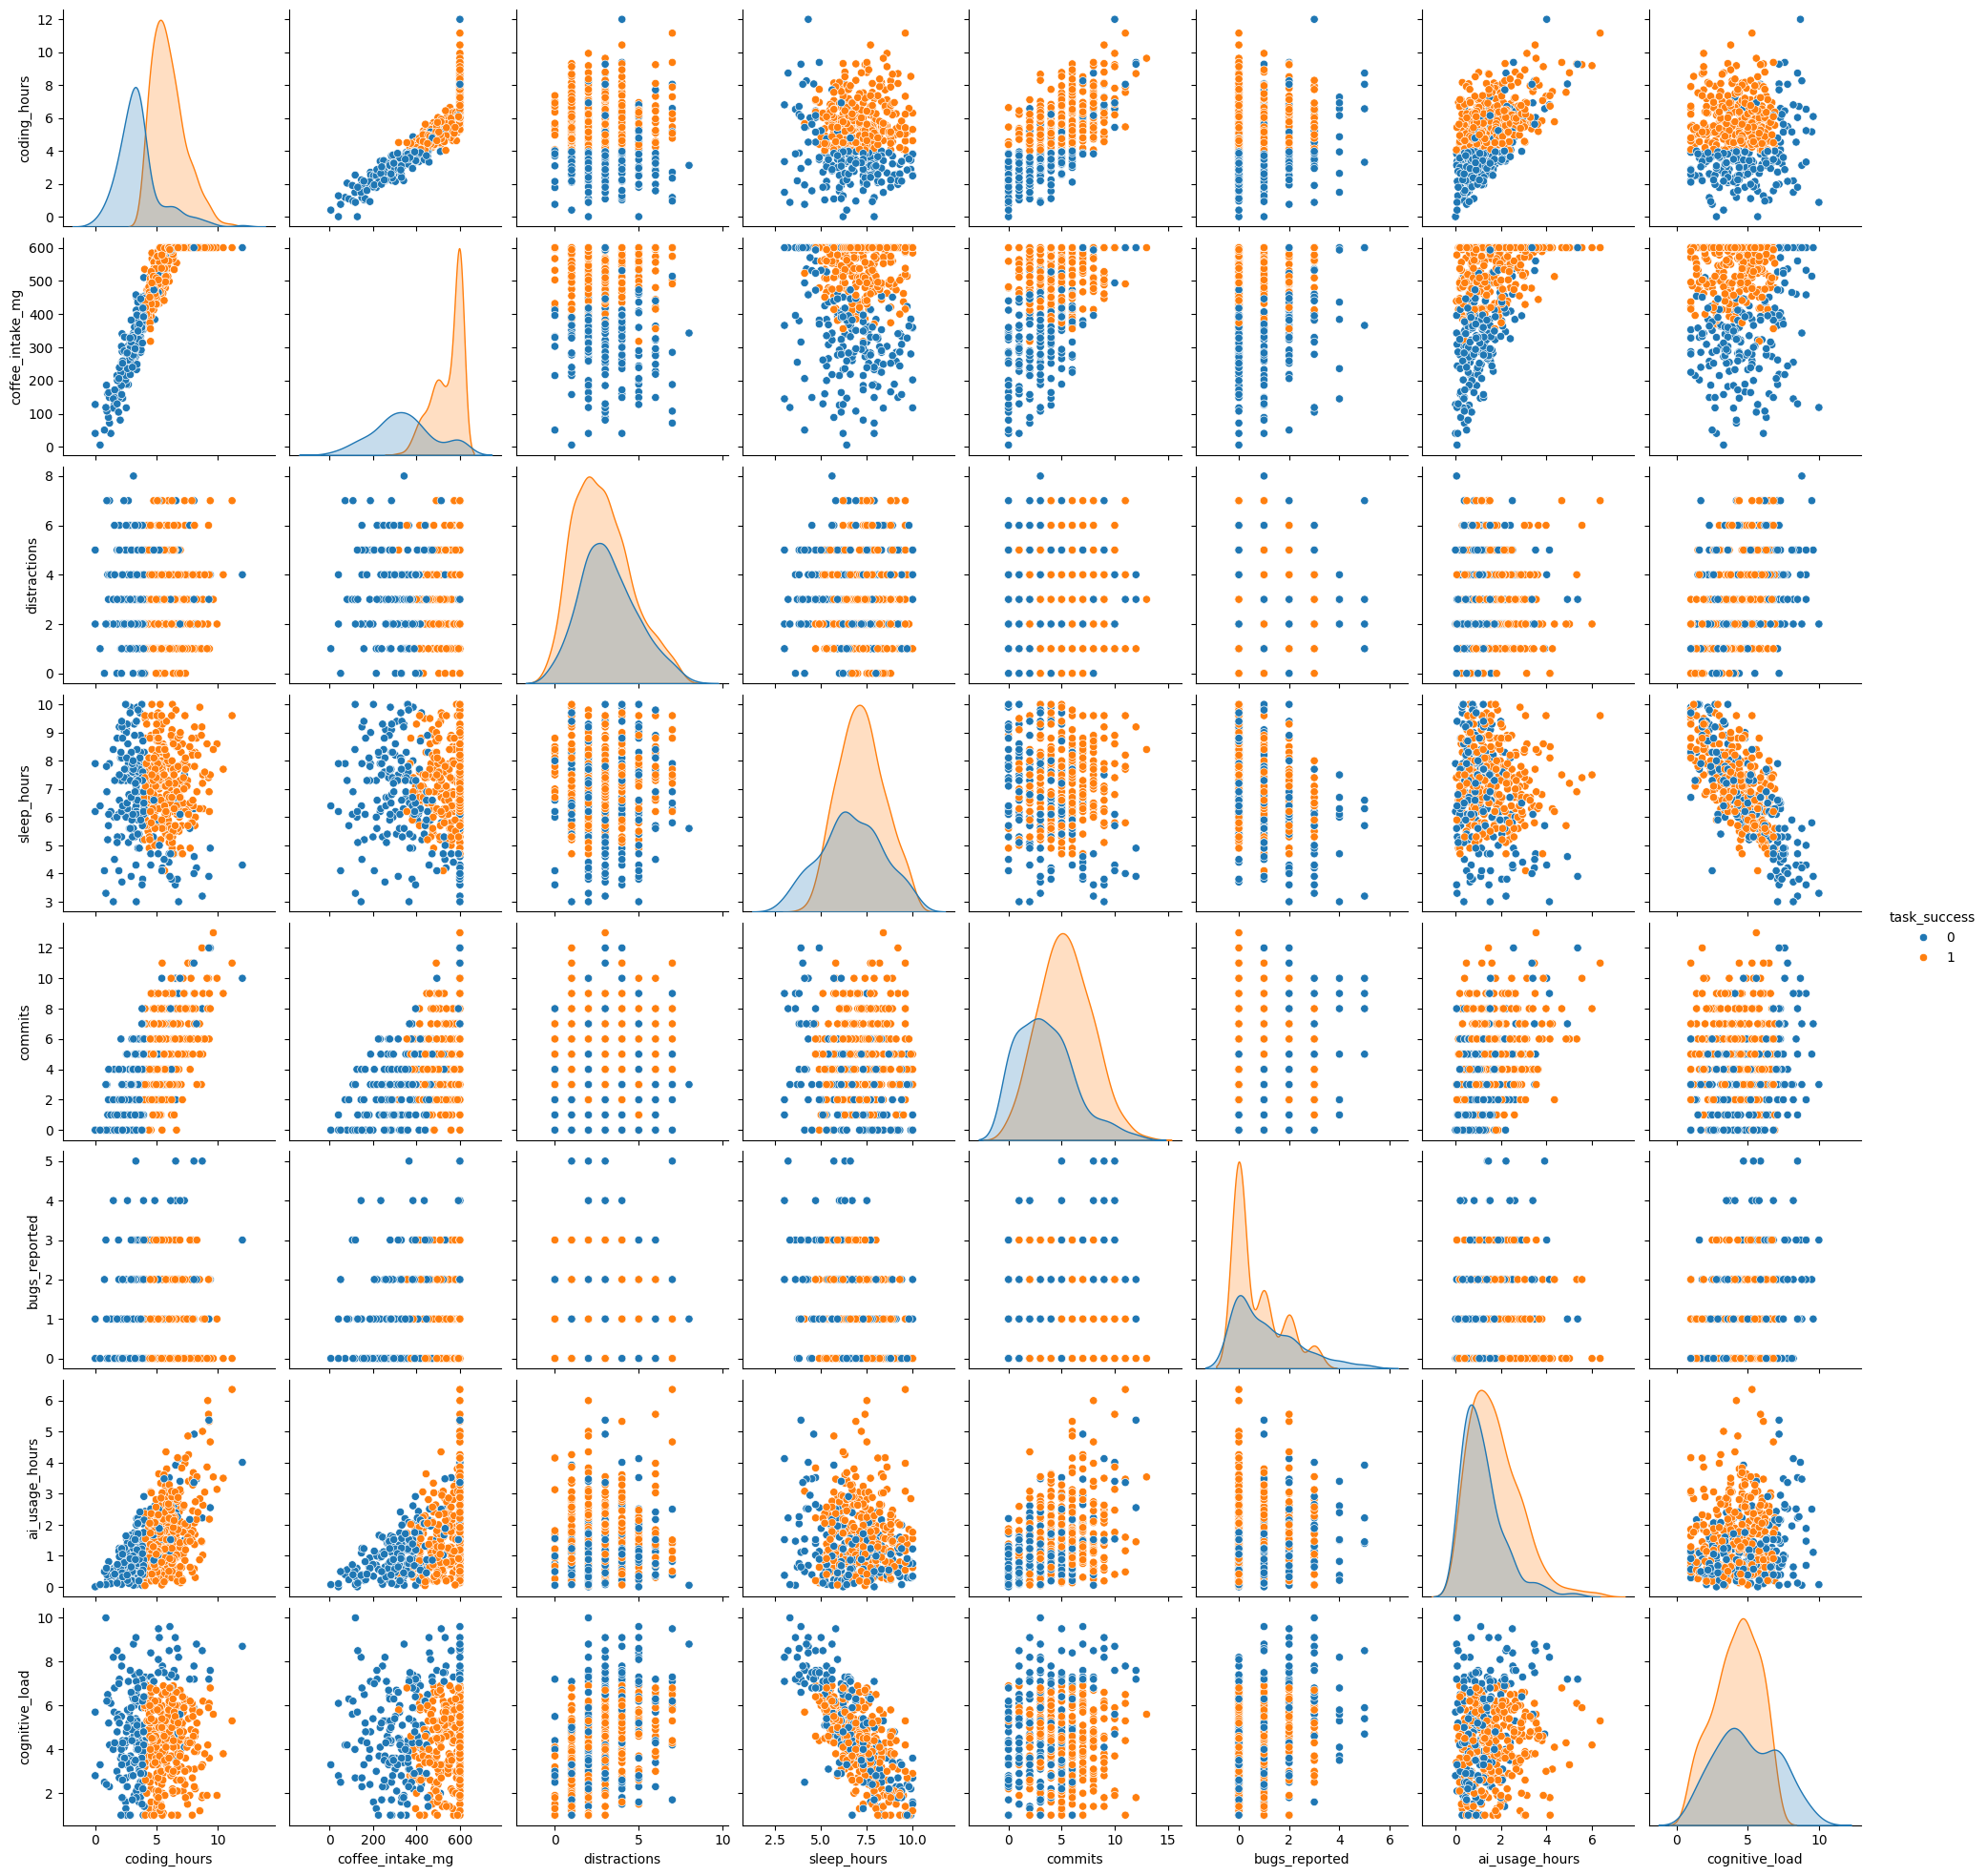

In [ ]:
sns.pairplot(df, hue='task_success')

In [16]:
df.head()

,coding_hours,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


## Machine Learning

In [17]:
x=df.drop(columns=["task_success"])
y=df["task_success"]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

x_train.shape,y_train.shape
y_pred=model.predict(x_test)
#Evaluation
accuracy_score=accuracy_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(f"The Accuracy Score Is: {accuracy_score}\n"
      f"The Confusion Matrix Is:\n{confusion_matrix}")


The Accuracy Score Is: 0.85
The Confusion Matrix Is:
[[28  6]
 [ 9 57]]


## New Data To Predict

In [18]:
import pandas as pd

# Assuming these are the original feature columns used in training
feature_names = ['coding_hours', 'coffee_intake_mg', 'distractions', 'sleep_hours',
                 'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load']

new_data = [2.30, 500, 3.5, 8.0, 2, 0, 2.50, 3.0]
input_df = pd.DataFrame([new_data], columns=feature_names)

prediction = model.predict(input_df)
print("Prediction:", prediction)
if (prediction[0]==0):
    print("The Task Will Not Be Successful")
else:
    print("The Task Will Be Successful")


Prediction: [1]
The Task Will Be Successful


## ✅ Conclusion

This project demonstrates how machine learning can be leveraged to predict task success using behavioral and productivity features such as coding hours, coffee intake, distractions, and sleep hours.

### 🔍 Key Takeaways:
- **Sleep** and **low distractions** are strong indicators of successful task completion. 😴📵
- Excessive **caffeine** or **AI tool usage** does not guarantee productivity and can be counterproductive. ☕🤖
- The model achieved an **accuracy of 85%**, showcasing a good balance between simplicity and performance.
- Logistic Regression proved effective and interpretable, but there's room to explore more complex models.

### 🚀 What's Next?
- ✅ Experiment with other classifiers (Random Forest, XGBoost)
- ✅ Perform hyperparameter tuning
- ✅ Integrate SHAP or LIME for feature importance and interpretability
- ✅ Deploy as a web app using Streamlit or Flask

> 🎯 _This project adds real-world value to productivity analytics by helping individuals or teams understand how behaviors affect outcomes._
